In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("ICC survey response.csv")
df = df.replace(to_replace="School of Computing and Information Systems (SCIS)", value="SCIS")
df = df.replace(to_replace="Lee Kong Chian School of Business (LKCSB)", value="LKCSB")
df

,School,Year,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,20
0,SCIS,4,Agree,Disagree,Agree,Agree,Agree,Agree,Disagree,Agree,...,Disagree,Agree,Agree,Agree,Agree,Agree,"Currently, I would choose to learn a new skill...",I believe that there is a role for everything....,"These 2 might not be mutually exclusive, but I...",NaN
1,SCIS,4,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,Disagree,...,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,Base on job description I will prioritise,Group harmony because with a share goal we can...,Learning things that are relevant and up to date,No
2,LKCSB,3,Disagree,Disagree,Agree,Disagree,Disagree,Agree,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Disagree,Learning a new skill that could potentially in...,Contributing individually so long as we get st...,Nothing really motivates me in my academic jou...,Nothing
3,LKCSB,4,Agree,Agree,Agree,Agree,Disagree,Disagree,Agree,Agree,...,Disagree,Disagree,Disagree,Agree,Disagree,Disagree,"When I was a Year 1 or Year 2 student, I would...","I would contribute individually, and seek help...","During the start of my academic journey, my fo...",NaN
4,SCIS,4,Disagree,Disagree,Agree,Disagree,Agree,Disagree,Disagree,Agree,...,Disagree,Disagree,Disagree,Agree,Disagree,Disagree,If I’m looking for my first internship then I ...,Maintaining group harmony as with group harmon...,Achieving immediate recognition is good to hav...,Nil
5,LKCSB,4,Disagree,Disagree,Agree,Disagree,Agree,Disagree,Disagree,Disagree,...,Disagree,Agree,Disagree,Agree,Disagree,Disagree,I try to think about it and weigh it in terms ...,I don't mind taking charge if there is no one ...,Preparing for future career success. I know th...,"Just knowing when to balance, shouldn't go all..."
6,LKCSB,4,Agree,Agree,Agree,Disagree,Agree,Disagree,Disagree,Disagree,...,Disagree,Disagree,Disagree,Agree,Agree,Agree,learning a new skill that I think will make my...,i prefer being an active contributing group me...,good grades as i dont have it,didnt do much on career specific goals because...
7,SCIS,4,Agree,Disagree,Disagree,Agree,Agree,Disagree,Disagree,Agree,...,Disagree,Disagree,Disagree,Agree,Disagree,Disagree,I would weigh the short term and long term ben...,Hearing everyone's opinion and moving forward ...,"Preparing for future career success, it will s...",NaN
8,LKCSB,4,Disagree,Disagree,Agree,Disagree,Disagree,Disagree,Disagree,Agree,...,Disagree,Disagree,Disagree,Disagree,Disagree,Disagree,I would choose learning a new skill. For examp...,I prefer to focus on maintaining group harmony...,"Preparing for future success, because the end ...","Nope, thank you!"
9,LKCSB,4,Disagree,Agree,Agree,Agree,Disagree,Disagree,Disagree,Disagree,...,Disagree,Agree,Disagree,Agree,Disagree,Disagree,I would weigh the pros and cons for both optio...,"Maintaining group harmony, while also being un...",Preparing for future career success as I am ab...,NaN


In [3]:
scis = df[df["School"] == "SCIS"]
scis = scis.transpose()
scis = scis.replace(to_replace="Agree", value=1)
scis = scis.replace(to_replace="Disagree", value=0)
scis

,0,1,4,7,10,11,12,13,15,17,...,21,27,29,31,32,33,34,35,36,37
School,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,...,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS,SCIS
Year,4,4,4,4,3,4,1,3,4,4,...,1,2,4,4,3,4,4,4,3,4
1,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,1
2,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
3,1,0,1,0,1,1,0,1,0,0,...,1,1,0,1,1,1,0,0,1,1
4,1,0,0,1,0,0,0,1,0,1,...,1,1,1,0,1,0,1,1,1,1
5,1,0,1,1,1,0,0,0,0,0,...,1,0,1,1,0,0,1,0,1,1
6,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
7,0,1,0,0,0,0,0,0,1,1,...,1,1,1,0,1,0,0,1,1,1
8,1,0,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,0


In [4]:
scis_binary = scis.iloc[2:18]
scis_binary

,0,1,4,7,10,11,12,13,15,17,...,21,27,29,31,32,33,34,35,36,37
1,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,1
2,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,1
3,1,0,1,0,1,1,0,1,0,0,...,1,1,0,1,1,1,0,0,1,1
4,1,0,0,1,0,0,0,1,0,1,...,1,1,1,0,1,0,1,1,1,1
5,1,0,1,1,1,0,0,0,0,0,...,1,0,1,1,0,0,1,0,1,1
6,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1
7,0,1,0,0,0,0,0,0,1,1,...,1,1,1,0,1,0,0,1,1,1
8,1,0,1,1,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,1,0
9,1,0,0,1,0,0,0,0,1,1,...,1,1,0,0,0,0,1,0,1,0
10,0,0,0,0,1,0,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0


In [5]:
scis_sto = scis_binary.iloc[:8].copy()
scis_sto_cols = scis_sto.shape[1]
scis_sto['Short Term Orientation'] = scis_sto.sum(axis=1)
scis_sto['Short Term Orientation %'] = scis_sto['Short Term Orientation'] / scis_sto_cols * 100
scis_sto

,0,1,4,7,10,11,12,13,15,17,...,29,31,32,33,34,35,36,37,Short Term Orientation,Short Term Orientation %
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,8,36.363636
2,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,6,27.272727
3,1,0,1,0,1,1,0,1,0,0,...,0,1,1,1,0,0,1,1,14,63.636364
4,1,0,0,1,0,0,0,1,0,1,...,1,0,1,0,1,1,1,1,14,63.636364
5,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,1,0,1,1,10,45.454545
6,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,7,31.818182
7,0,1,0,0,0,0,0,0,1,1,...,1,0,1,0,0,1,1,1,10,45.454545
8,1,0,1,1,1,0,0,0,0,0,...,1,0,0,0,1,1,1,0,9,40.909091


In [6]:
scis_indiv = scis_binary.iloc[8:].copy()
scis_indiv_cols = scis_indiv.shape[1]
scis_indiv['Individualism'] = scis_indiv.sum(axis=1)
scis_indiv['Individualism %'] = scis_indiv['Individualism'] / scis_indiv_cols * 100
scis_indiv

,0,1,4,7,10,11,12,13,15,17,...,29,31,32,33,34,35,36,37,Individualism,Individualism %
9,1,0,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,1,0,10,45.454545
10,0,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,6,27.272727
11,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,2,9.090909
12,1,0,0,0,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,14,63.636364
13,1,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,5,22.727273
14,1,0,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,1,1,18,81.818182
15,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,7,31.818182
16,1,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,8,36.363636


In [7]:
lkcsb = df[df["School"] == "LKCSB"]
lkcsb = lkcsb.transpose()
lkcsb = lkcsb.replace(to_replace="Agree", value=1)
lkcsb = lkcsb.replace(to_replace="Disagree", value=0)
lkcsb

,2,3,5,6,8,9,14,16,19,22,23,24,25,26,28,30,38,39,40,41
School,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB,LKCSB
Year,3,4,4,4,4,4,4,2,3,2,3,4,5,3,2,4,1,1,3,3
1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,1,1
2,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1
4,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1
5,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1
6,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0,1,1
7,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1
8,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


In [8]:
lkcsb_binary = lkcsb.iloc[2:18]
lkcsb_binary

,2,3,5,6,8,9,14,16,19,22,23,24,25,26,28,30,38,39,40,41
1,0,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1,1,1
2,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,0,1,1
4,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,1,1,1,1,1
5,0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,1
6,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,0,0,0,1,1
7,1,1,0,0,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,1
8,1,1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1
9,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,1
10,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0


In [9]:
lkcsb_sto = lkcsb_binary.iloc[:8].copy()
lkcsb_sto_cols = lkcsb_sto.shape[1]
lkcsb_sto['Short Term Orientation'] = lkcsb_sto.sum(axis=1)
lkcsb_sto['Short Term Orientation %'] = lkcsb_sto['Short Term Orientation'] / lkcsb_sto_cols * 100
lkcsb_sto


,2,3,5,6,8,9,14,16,19,22,...,25,26,28,30,38,39,40,41,Short Term Orientation,Short Term Orientation %
1,0,1,0,1,0,0,0,0,1,1,...,1,0,1,0,0,1,1,1,11,55.0
2,0,1,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,6,30.0
3,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,0,1,1,17,85.0
4,0,1,0,0,0,1,0,0,1,1,...,1,0,0,1,1,1,1,1,11,55.0
5,0,0,1,1,0,0,1,0,1,1,...,1,1,1,0,0,1,1,1,13,65.0
6,1,0,0,0,0,0,1,0,0,1,...,1,1,1,0,0,0,1,1,9,45.0
7,1,1,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,1,1,9,45.0
8,1,1,0,0,1,0,1,1,0,0,...,0,0,1,1,0,0,0,1,9,45.0


In [10]:
lkcsb_indiv = lkcsb_binary.iloc[8:].copy()
lkcsb_indiv_cols = lkcsb_indiv.shape[1]
lkcsb_indiv['Individualism'] = lkcsb_indiv.sum(axis=1)
lkcsb_indiv['Individualism %'] = lkcsb_indiv['Individualism'] / lkcsb_indiv_cols * 100
lkcsb_indiv

,2,3,5,6,8,9,14,16,19,22,...,25,26,28,30,38,39,40,41,Individualism,Individualism %
9,1,1,1,0,0,0,0,1,0,1,...,0,1,1,1,1,0,0,1,10,50.0
10,1,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,5,25.0
11,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,3,15.0
12,1,0,1,0,0,1,1,1,1,1,...,0,0,1,1,0,0,0,0,10,50.0
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,5,25.0
14,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,1,0,0,1,16,80.0
15,1,0,0,1,0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,7,35.0
16,0,0,0,1,0,0,0,0,0,1,...,1,1,0,0,0,1,1,0,7,35.0


In [11]:
scis_sto_rate = scis_sto['Short Term Orientation %'].mean()
scis_sto_rate

44.31818181818182

In [12]:
scis_indiv_rate = scis_indiv["Individualism %"].mean()
scis_indiv_rate

39.77272727272727

In [13]:
lkcsb_sto_rate = lkcsb_sto['Short Term Orientation %'].mean()
lkcsb_sto_rate

53.125

In [14]:
lkcsb_indiv_rate = lkcsb_indiv["Individualism %"].mean()
lkcsb_indiv_rate

39.375

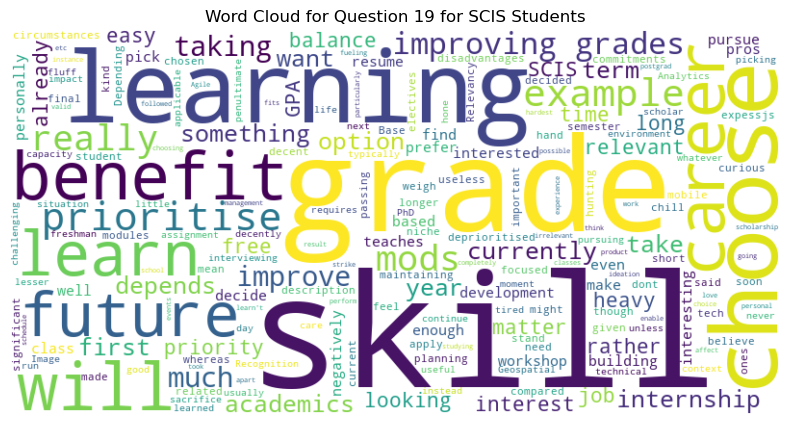

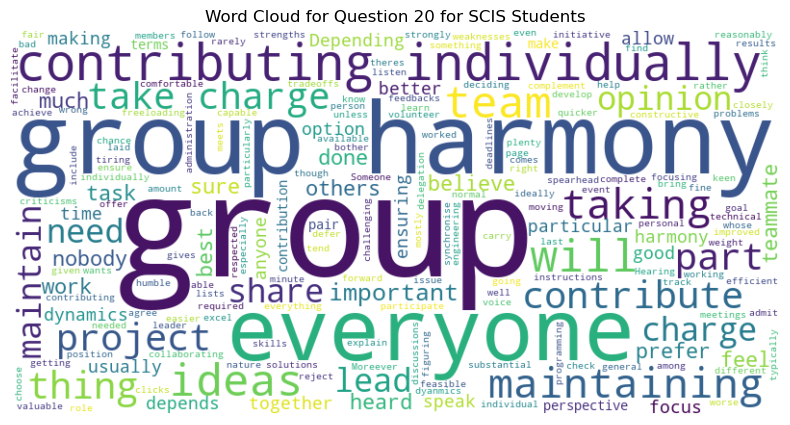

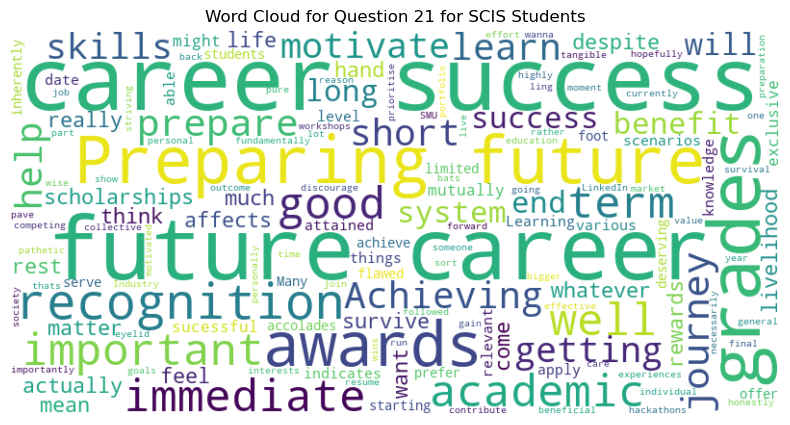

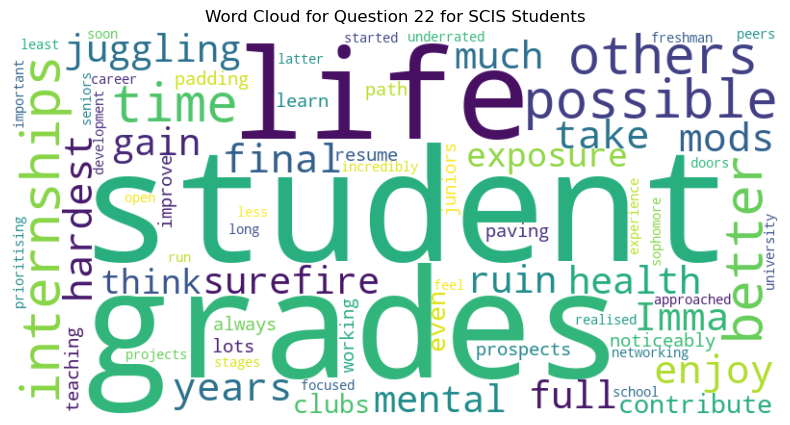

In [15]:
scis_open = scis.iloc[18:].reset_index()
scis_open_rows = scis_open.shape[0] # each question
scis_open_cols = scis_open.shape[1] # each repondent
responses_by_question = {}
for i in range(scis_open_rows):
    responses = []
    for j in range(1, scis_open_cols):
        response = str(scis_open.iloc[i, j]).split()
        filtered_words = [word for word in response if word.lower() not in STOPWORDS and len(word) > 3]
        responses.append(" ".join(filtered_words))
    responses_by_question[i] = " ".join(responses)
for question, responses in responses_by_question.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(responses)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Question {question + 19} for SCIS Students')
    plt.show()

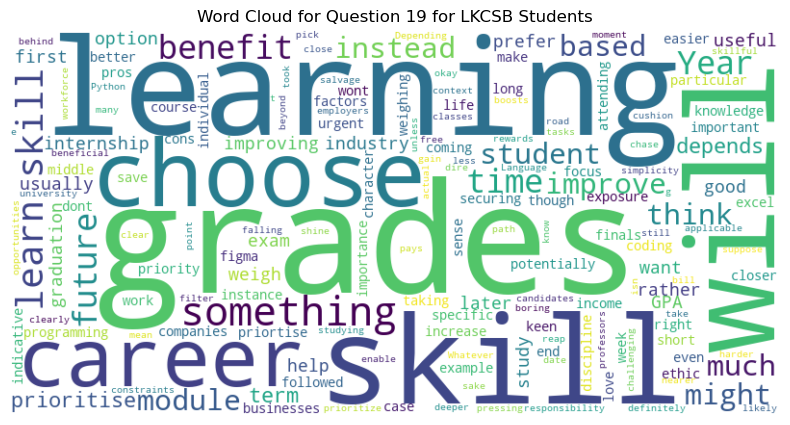

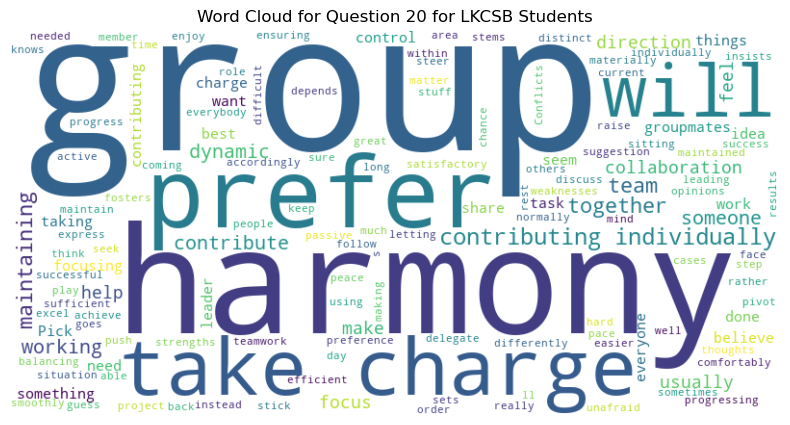

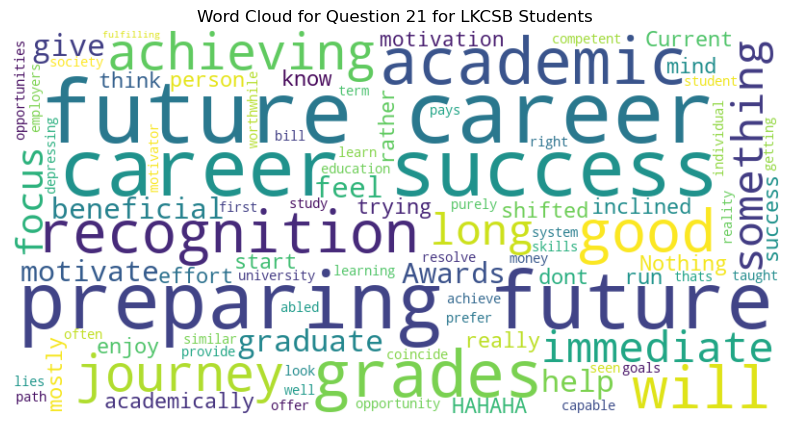

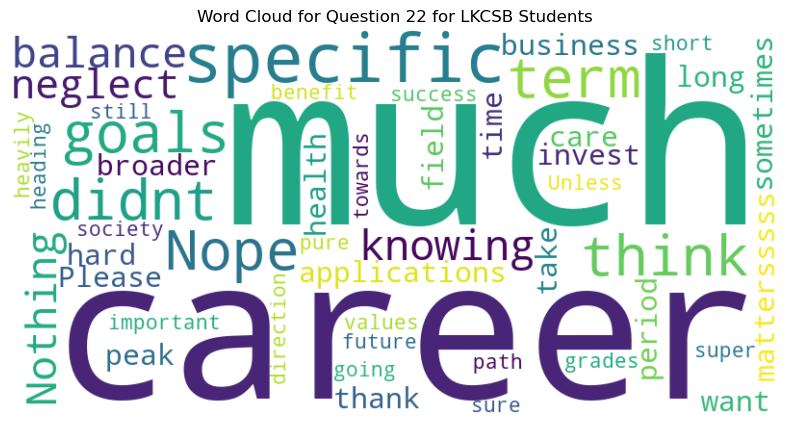

In [16]:
lkcsb_open = lkcsb.iloc[18:].reset_index()
lkcsb_open_rows = lkcsb_open.shape[0] # each question
lkcsb_open_cols = lkcsb_open.shape[1] # each repondent
responses_by_question = {}
for i in range(lkcsb_open_rows):
    responses = []
    for j in range(1, lkcsb_open_cols):
        response = str(lkcsb_open.iloc[i, j]).split()
        filtered_words = [word for word in response if word.lower() not in STOPWORDS and len(word) > 3]
        responses.append(" ".join(filtered_words))
    responses_by_question[i] = " ".join(responses)
for question, responses in responses_by_question.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(responses)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Question {question + 19} for LKCSB Students')
    plt.show()